In [1]:
from metadata_toolbox import utils as meta
import glob
import pandas as pd

from dariah_topics.preprocessing import read_from_pathlist
from dariah_topics import preprocessing
from dariah_topics import postprocessing
from dariah_topics import visualization
import lda
from collections import Counter
import matplotlib.pyplot as plt



In [2]:
'''import importlib.util
spec = importlib.util.spec_from_file_location("visualization", "../Topics/dariah_topics/visualization.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
'''

'import importlib.util\nspec = importlib.util.spec_from_file_location("visualization", "../Topics/dariah_topics/visualization.py")\nfoo = importlib.util.module_from_spec(spec)\nspec.loader.exec_module(foo)\n'

In [3]:
metadata_list =[]
for filename in glob.glob('../Topics/grenzboten_sample/*'):
    metadata_list.append(meta.fname2metadata(filename, pattern='{author}_{year}_{type}_{number}'))

In [4]:
metadata_df = pd.concat(metadata_list)
metadata_df

,author,number,type,year
../Topics/grenzboten_sample/Beck_1844_Tagebuch_56.txt,Beck,56,Tagebuch,1844
../Topics/grenzboten_sample/Berto_1915_Kriegstagebuch_94.txt,Berto,94,Kriegstagebuch,1915
../Topics/grenzboten_sample/Castelli_1846_Tagebuch_51.txt,Castelli,51,Tagebuch,1846
../Topics/grenzboten_sample/Cleinom_1914_Kriegstagebuch_94.txt,Cleinom,94,Kriegstagebuch,1914
../Topics/grenzboten_sample/Dix_1914_Kriegstagebuch_37.txt,Dix,37,Kriegstagebuch,1914
../Topics/grenzboten_sample/Ferdinand_1846_Tagebuch_72.txt,Ferdinand,72,Tagebuch,1846
../Topics/grenzboten_sample/Jörgel_1844_Tagebuch_88.txt,Jörgel,88,Tagebuch,1844
../Topics/grenzboten_sample/Kader_1846_Tagebuch_82.txt,Kader,82,Tagebuch,1846
../Topics/grenzboten_sample/Lacratelle_1845_Tagebuch_93.txt,Lacratelle,93,Tagebuch,1845
../Topics/grenzboten_sample/Lichler_1916_Kriegstagebuch_48.txt,Lichler,48,Kriegstagebuch,1916


In [5]:
corpus = list(preprocessing.read_from_pathlist(list(metadata_df.index.values)))

In [6]:
tokenized_corpus = [list(preprocessing.tokenize(document)) for document in corpus]
tokenized_corpus[0][0:13]


['tagebuch',
 'von',
 'karl',
 'beck',
 'man',
 'spricht',
 'seit',
 'vierzehn',
 'tagen',
 'von',
 'einem',
 'vollständigen',
 'ministerwechsel']

In [7]:
document_term_matrix = preprocessing.create_document_term_matrix(tokenized_corpus, list(metadata_df.index.values))
document_term_matrix[:5]


,die,der,und,in,den,von,zu,das,des,nicht,...,weitlinge,weitschichtige,welker,welscher,werthschätzung,wesentlicher,wichtigeren,widerliche,widersetzlichen,gasfrage
../Topics/grenzboten_sample/Beck_1844_Tagebuch_56.txt,90.0,92.0,84.0,70.0,30.0,26.0,25.0,16.0,25.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
../Topics/grenzboten_sample/Berto_1915_Kriegstagebuch_94.txt,11.0,32.0,24.0,12.0,8.0,17.0,0.0,3.0,5.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
../Topics/grenzboten_sample/Castelli_1846_Tagebuch_51.txt,226.0,177.0,188.0,111.0,73.0,62.0,93.0,60.0,35.0,78.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
../Topics/grenzboten_sample/Cleinom_1914_Kriegstagebuch_94.txt,39.0,48.0,34.0,28.0,15.0,25.0,4.0,5.0,11.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
../Topics/grenzboten_sample/Dix_1914_Kriegstagebuch_37.txt,40.0,34.0,15.0,17.0,10.0,19.0,5.0,6.0,18.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
stopwords = preprocessing.find_stopwords(document_term_matrix, most_frequent_tokens=100)

In [9]:
hapax_legomena = preprocessing.find_hapax_legomena(document_term_matrix)
print("Total number of types in corpus:", document_term_matrix.shape[1])
print("Total number of hapax legomena:", len(hapax_legomena))

Total number of types in corpus: 24451
Total number of hapax legomena: 19757


In [10]:
path_to_stopwordlist = '../Topics/tutorial_supplementals/stopwords/de.txt'
external_stopwords = [line.strip() for line in open(path_to_stopwordlist, 'r', encoding='utf-8')]

In [11]:
features = stopwords + hapax_legomena + external_stopwords
document_term_matrix = preprocessing.remove_features(features, document_term_matrix=document_term_matrix)

In [12]:
vocabulary = document_term_matrix.columns
vocabulary

Index(['franzosen', 'genommen', 'abgewiesen', 'südlich', 'berlin', 'lassen',
       'geschütze', 'englische', 'deutschland', 'januar',
       ...
       'schlechteste', 'dubatowka', 'palameix', 'verschlossene', 'eimer',
       'schicksale', 'eilwagen', 'klippe', 'rennt', 'zuschrieb'],
      dtype='object', length=4242)

In [13]:
document_term_matrix_arr = document_term_matrix.as_matrix().astype(int)
document_term_matrix_arr

array([[ 0,  1,  0, ...,  0,  0,  0],
       [ 0,  9,  3, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  0,  0,  0],
       ...,
       [ 6,  6, 19, ...,  0,  0,  0],
       [ 3,  2,  0, ...,  0,  0,  0],
       [ 1,  3,  0, ...,  0,  0,  0]])

In [14]:
%%time

model = lda.LDA(n_topics=10, n_iter=500)
model.fit(document_term_matrix_arr)

INFO:lda:n_documents: 30
INFO:lda:vocab_size: 4242
INFO:lda:n_words: 35657
INFO:lda:n_topics: 10
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -427048
INFO:lda:<10> log likelihood: -303297
INFO:lda:<20> log likelihood: -296388
INFO:lda:<30> log likelihood: -295196
INFO:lda:<40> log likelihood: -294648
INFO:lda:<50> log likelihood: -293529
INFO:lda:<60> log likelihood: -293432
INFO:lda:<70> log likelihood: -293081
INFO:lda:<80> log likelihood: -292408
INFO:lda:<90> log likelihood: -292440
INFO:lda:<100> log likelihood: -291860
INFO:lda:<110> log likelihood: -291895
INFO:lda:<120> log likelihood: -291731
INFO:lda:<130> log likelihood: -290988
INFO:lda:<140> log likelihood: -290861
INFO:lda:<150> log likelihood: -290729
INFO:lda:<160> log likelihood: -290759
INFO:lda:<170> log likelihood: -290684
INFO:lda:<180> log likelihood: -290683
INFO:lda:<190> log likelihood: -290230
INFO:lda:<200> log likelihood: -290373
INFO:lda:<210> log likelihood: -290210
INFO:lda:<220> log likelihood: -290

CPU times: user 2.91 s, sys: 28 ms, total: 2.94 s
Wall time: 2.92 s


In [15]:
topics = postprocessing.show_topics(model=model,
                                    vocabulary=vocabulary)
topics

INFO:dariah_topics.postprocessing:Accessing topics from lda model ...


,Key 0,Key 1,Key 2,Key 3,Key 4,Key 5,Key 6,Key 7,Key 8,Key 9
Topic 0,zeitung,leipzig,finden,weiß,publicum,fremden,halten,scheint,dinge,thun
Topic 1,oesterreich,französischen,deutscher,deutschland,könig,berlin,politischen,welt,art,interesse
Topic 2,nördlich,geschütze,abgeschlagen,östlich,südlich,abgewiesen,verlusten,feindliche,kämpfe,besetzt
Topic 3,stadt,nämlich,namen,bringen,geben,zeitungen,meinung,guten,lassen,theil
Topic 4,preußen,glauben,regierung,presse,polen,england,artikel,volk,frage,that
Topic 5,september,frankreich,antwerpen,franzosen,lamennais,sprache,belgien,paris,krakau,krakauer
Topic 6,lassen,deutschland,namentlich,indeß,scheint,ward,hiesigen,sieht,wien,stande
Topic 7,juli,märz,april,stellungen,offiziere,südlich,gestürmt,genommen,italiener,englische
Topic 8,wissen,seite,steht,gesellschaft,wiener,alten,berliner,wien,censur,folge
Topic 9,januar,dezember,englische,franzosen,truppen,erobert,engländer,österreicher,abgewiesen,türken


In [16]:
document_topics = postprocessing.show_document_topics(model=model,
                                                      topics=topics,
                                                      document_labels=list(metadata_df.index.values))
document_topics

,../Topics/grenzboten_sample/Beck_1844_Tagebuch_56.txt,../Topics/grenzboten_sample/Berto_1915_Kriegstagebuch_94.txt,../Topics/grenzboten_sample/Castelli_1846_Tagebuch_51.txt,../Topics/grenzboten_sample/Cleinom_1914_Kriegstagebuch_94.txt,../Topics/grenzboten_sample/Dix_1914_Kriegstagebuch_37.txt,../Topics/grenzboten_sample/Ferdinand_1846_Tagebuch_72.txt,../Topics/grenzboten_sample/Jörgel_1844_Tagebuch_88.txt,../Topics/grenzboten_sample/Kader_1846_Tagebuch_82.txt,../Topics/grenzboten_sample/Lacratelle_1845_Tagebuch_93.txt,../Topics/grenzboten_sample/Lichler_1916_Kriegstagebuch_48.txt,...,../Topics/grenzboten_sample/Unbekannt_1844_Tagebuch_70.txt,../Topics/grenzboten_sample/Unbekannt_1844_Tagebuch_82.txt,../Topics/grenzboten_sample/Unbekannt_1845_Tagebuch_52.txt,../Topics/grenzboten_sample/Unbekannt_1845_Tagebuch_85.txt,../Topics/grenzboten_sample/Unbekannt_1846_Tagebuch_88.txt,../Topics/grenzboten_sample/Unbekannt_1846_Tagebuch_96.txt,../Topics/grenzboten_sample/Weber_1916_Kriegstagebuch_69.txt,../Topics/grenzboten_sample/Weber_1916_Kriegstagebuch_81.txt,../Topics/grenzboten_sample/Wickenburg_1845_Tagebuch_62.txt,../Topics/grenzboten_sample/Zedlitz_1845_Tagebuch_81.txt
zeitung leipzig finden,0.140484,0.000332,0.129284,0.000253,0.000262,0.097253,0.116169,0.071442,0.053441,0.004829,...,0.086444,0.157685,0.109240,0.114009,0.114505,0.124135,0.005467,0.000136,0.468455,0.093675
oesterreich französischen deutscher,0.316290,0.000332,0.184059,0.020455,0.068504,0.498352,0.313005,0.058591,0.272733,0.004829,...,0.217591,0.139372,0.154529,0.142237,0.165212,0.164852,0.002800,0.001501,0.107860,0.077445
nördlich geschütze abgeschlagen,0.000161,0.698007,0.000772,0.288131,0.084252,0.000042,0.000176,0.001000,0.000064,0.313240,...,0.000063,0.000065,0.000037,0.000052,0.000118,0.000025,0.173467,0.248431,0.000053,0.000042
stadt nämlich namen,0.195323,0.003654,0.133497,0.000253,0.000262,0.109510,0.095079,0.195669,0.379486,0.001713,...,0.088966,0.170111,0.126041,0.208625,0.472995,0.145720,0.000133,0.000136,0.171588,0.156097
preußen glauben regierung,0.090484,0.000332,0.393329,0.025505,0.018635,0.126839,0.123199,0.415564,0.115177,0.000156,...,0.102207,0.105363,0.113623,0.087872,0.115684,0.197228,0.000133,0.000136,0.054222,0.132792
september frankreich antwerpen,0.005000,0.000332,0.007093,0.035606,0.391339,0.006805,0.017750,0.010043,0.000064,0.000156,...,0.004477,0.008568,0.016472,0.009462,0.008373,0.241624,0.000133,0.000136,0.010674,0.011278
lassen deutschland namentlich,0.024355,0.013621,0.040098,0.007828,0.000262,0.086686,0.000176,0.097144,0.044437,0.000156,...,0.036633,0.293067,0.293682,0.091532,0.066156,0.042948,0.000133,0.004229,0.070154,0.240990
juli märz april,0.000161,0.159801,0.000070,0.055808,0.026509,0.001733,0.003691,0.002903,0.002637,0.596729,...,0.000063,0.002681,0.000037,0.002666,0.002476,0.000025,0.730800,0.656344,0.002177,0.002538
wissen seite steht,0.208226,0.000332,0.111025,0.000253,0.021260,0.072739,0.330580,0.137601,0.117749,0.000156,...,0.446469,0.123022,0.181191,0.333037,0.054363,0.078268,0.001467,0.005593,0.113702,0.283854
januar dezember englische,0.019516,0.123256,0.000772,0.565909,0.388714,0.000042,0.000176,0.010043,0.014212,0.078037,...,0.017087,0.000065,0.005150,0.010507,0.000118,0.005175,0.085467,0.083356,0.001115,0.001290


In [17]:
plot_document_topics_object = visualization.PlotDocumentTopics(document_topics,
                                                      enable_notebook=True)

Loading BokehJS ...

1844
1846
1844
1844
1844
1845
1845
1846
1846
1845
1844
1846
1846
1844
1845
1844
1844
1844
1845
1845
1846
1846
1845
1915
1914
1916
1915
1914
1915
1915
1916
1916
1914
1915
1914
1916
1916
1844
1846
1846
1846
1845
1844
1844
1845
1845
1846
1846
1845
1845
1846
1846
1844
1846
1845
1844
1844
1845
1846
1846
1845
1914
1846
1844
1844
1845
1845
1915
1916
1915
1915
1916
1916
1916
1916
1844
1846
1844
1846
1845
1844
1844
1844
1845
1845
1845
1845
1915
1914
1914
1914
1915
1915
1916
1914
1915
1914


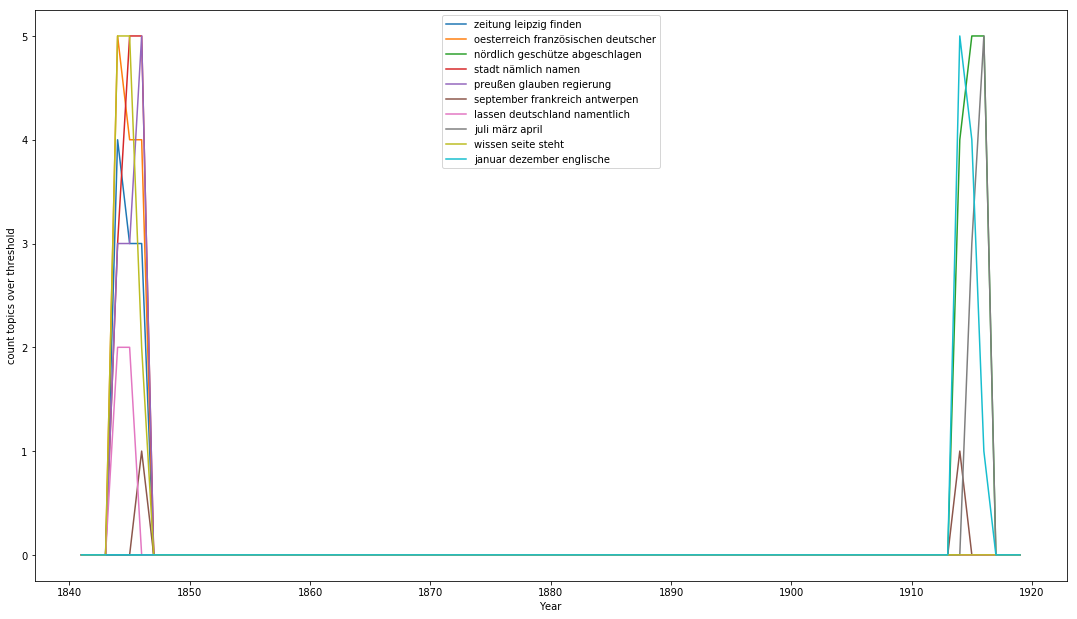

In [20]:
plot_document_topics_object.topic_over_time(metadata_df)